In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
import warnings
warnings.filterwarnings('ignore')

Required libraries :: imported : 

### Steps for the Data Analytics : 


In [314]:
df  = pd.read_csv('cars_data.csv')

File Imported and check for the basic details from the dataframe

In [315]:
df.shape

(46639, 17)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          46639 non-null  object 
 1   model         46639 non-null  object 
 2   year          46639 non-null  int64  
 3   price         46639 non-null  float64
 4   mileage       46437 non-null  float64
 5   fuel type     46638 non-null  object 
 6   engine size   45987 non-null  float64
 7   Color         46491 non-null  object 
 8   body type     46485 non-null  object 
 9   owners        41056 non-null  float64
 10  transmission  46639 non-null  object 
 11  seats         27433 non-null  float64
 12  fuel economy  25860 non-null  float64
 13  max speed     21831 non-null  float64
 14  engine power  30430 non-null  float64
 15  Seller Type   46639 non-null  object 
 16  Location      46639 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 6.0+ MB


In [317]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,owners,transmission,seats,fuel economy,max speed,engine power,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,1.0,Manual,5.0,81.0,116.0,99.0,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,2.0,Manual,3.0,NaN,NaN,NaN,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,1.0,Manual,5.0,NaN,NaN,NaN,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,1.0,Manual,3.0,NaN,NaN,NaN,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,2.0,Manual,5.0,79.0,116.0,99.0,Dealer,Cork


In here next steps to be check for the null values and dublicate values. We also can check for the missing values and duplicate values

In [318]:
df.isnull().sum()

make                0
model               0
year                0
price               0
mileage           202
fuel type           1
engine size       652
Color             148
body type         154
owners           5583
transmission        0
seats           19206
fuel economy    20779
max speed       24808
engine power    16209
Seller Type         0
Location            0
dtype: int64

As we can see there are some missing values in the dataset and we will check the columns which haev more than 30% of the values as null or empty.
For the columns which have more than 30% vlaues as null we will drop the values. 


In [319]:
len(df)

46639

In [320]:
emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

9

In [321]:
# Checking the empty columns selected are : 
print(emptycol)

mileage           202
engine size       652
Color             148
body type         154
owners           5583
seats           19206
fuel economy    20779
max speed       24808
engine power    16209
dtype: int64


In [322]:
# Checking the columns exactly how many columns have the vlaues more than 30% in the dataset : 
df.isnull().sum()/len(df)*100

make             0.000000
model            0.000000
year             0.000000
price            0.000000
mileage          0.433114
fuel type        0.002144
engine size      1.397972
Color            0.317331
body type        0.330196
owners          11.970668
transmission     0.000000
seats           41.180128
fuel economy    44.552842
max speed       53.191535
engine power    34.754176
Seller Type      0.000000
Location         0.000000
dtype: float64

Out of the selected columns as 
1. mileage           202
2. engine size       652
3. Color             148
4. body type         154
5. owners           5583
6. seats           19206
7. fuel economy    20779
8. max speed       24808
9. engine power    16209

we can see that : for the mileage, engine Size, Color and Body Type we can impude the values.
and for the owners, Seats, Fuel Economy, Maxspeed, and Engine power we would be dropping the columns

In [323]:
dropping_columns  = ['owners', 'seats', 'fuel economy',
       'max speed', 'engine power']

# Dropping the above mentioned columns : 
df.drop(labels=dropping_columns , axis=1 , inplace=True)

In [324]:
# Checking the data frame again : 
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [325]:
df.shape

(46639, 12)

Now the columns are reduced from 17 to 12 : The missing values for the Mileage and Engine Size to be imuted while for the Color and Body Type we would drop the null values

In [326]:
df.describe()

,year,price,mileage,engine size
count,46639.000000,46639.000000,4.643700e+04,45987.000000
mean,2016.196059,20003.792427,5.142447e+04,1.662876
std,3.275273,13159.267285,4.416752e+04,0.440538
min,1991.000000,1000.000000,0.000000e+00,1.000000
25%,2015.000000,11900.000000,1.728800e+04,1.400000
50%,2017.000000,16995.000000,4.340700e+04,1.600000
75%,2019.000000,24950.000000,7.705000e+04,2.000000
max,2021.000000,169950.000000,1.708817e+06,6.300000


In [327]:
mileage_mean  = df['mileage'].mean()
round(mileage_mean) # we are rounding it to check 

51424

In [328]:
# Make the same for the engine size also :  
engine_size = df['engine size'].mean()
round(engine_size)

2

In [329]:
# We can impude the values in the missing values. 
df['mileage'].fillna(mileage_mean , inplace=True)
df['engine size'].fillna(engine_size , inplace=True)

In [330]:
# Check the data frame again :
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [331]:
df.isnull().sum()

make              0
model             0
year              0
price             0
mileage           0
fuel type         1
engine size       0
Color           148
body type       154
transmission      0
Seller Type       0
Location          0
dtype: int64

For the remaining rows of Color and body type we simply can remove the missing values and check the dataframe again. 

In [332]:
df = df.dropna()

In [333]:
df.shape

(46336, 12)

In [334]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [335]:
df.isnull().sum()

make            0
model           0
year            0
price           0
mileage         0
fuel type       0
engine size     0
Color           0
body type       0
transmission    0
Seller Type     0
Location        0
dtype: int64

Now df doesnot have the missing or null values  : we can check for the duplicate values in the data frame.

In [336]:
df.duplicated().sum()

np.int64(1011)

In [337]:
# Removing the duplicate rows :
df = df.drop_duplicates()

In [338]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


We would be doing the univariate and bivariate analysis now for the given dataset.

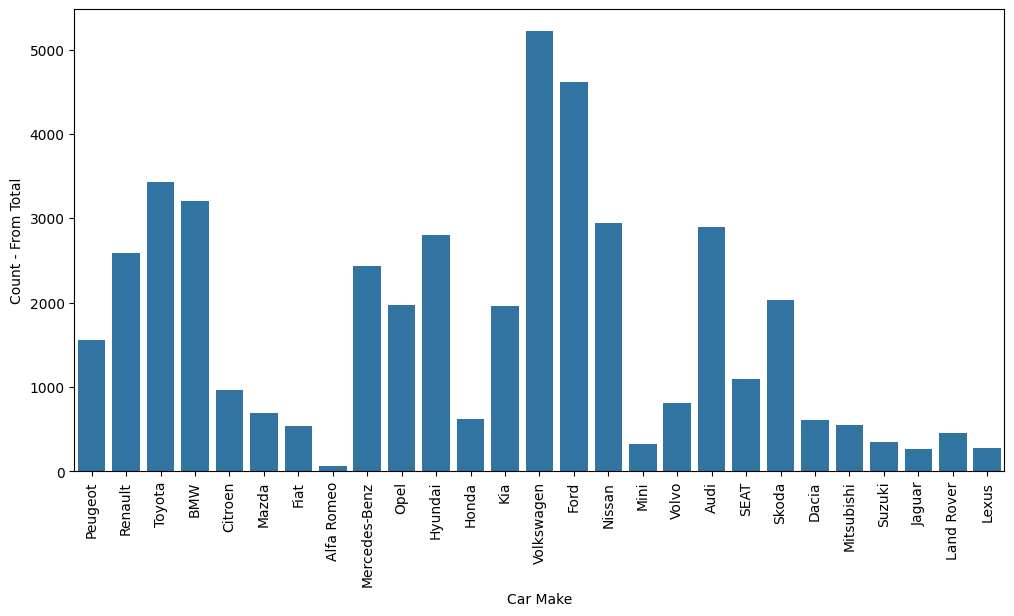

In [339]:
# Lets check the count frequency for  the make in the iven dataset over the period of the dataset : \
plt.figure(figsize=(12 ,6))
sns.countplot(x='make'  , data = df)
plt.xlabel("Car Make")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()


We can see the max count in the dataset is of the Volkswagen means they have the highest selling count lets do the smae analysis for :  year, fueltype, color, body type, transmissin, seller and location. 

We can check the each variable independently 

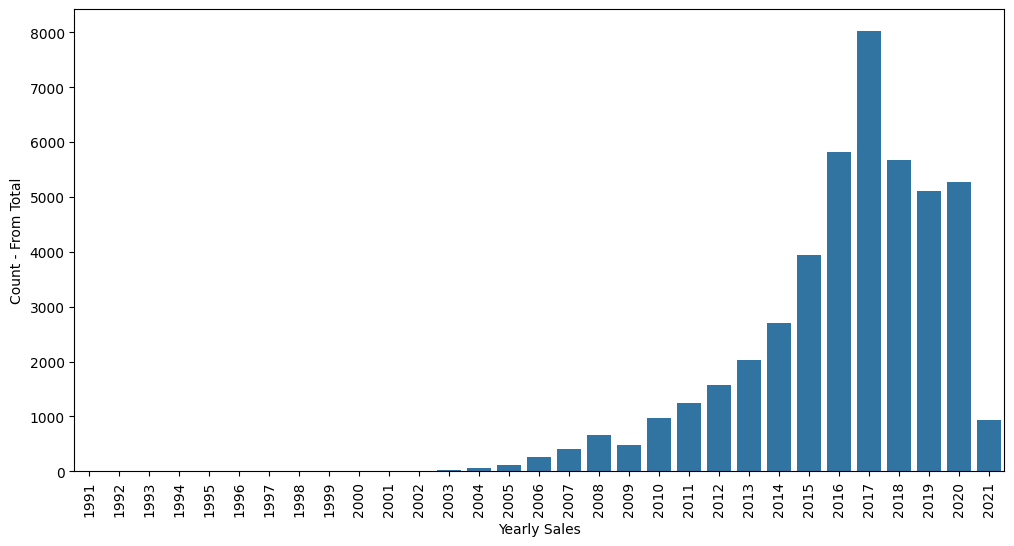

In [340]:
plt.figure(figsize=(12 ,6))
sns.countplot(x='year'  , data = df)
plt.xlabel("Yearly Sales")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()

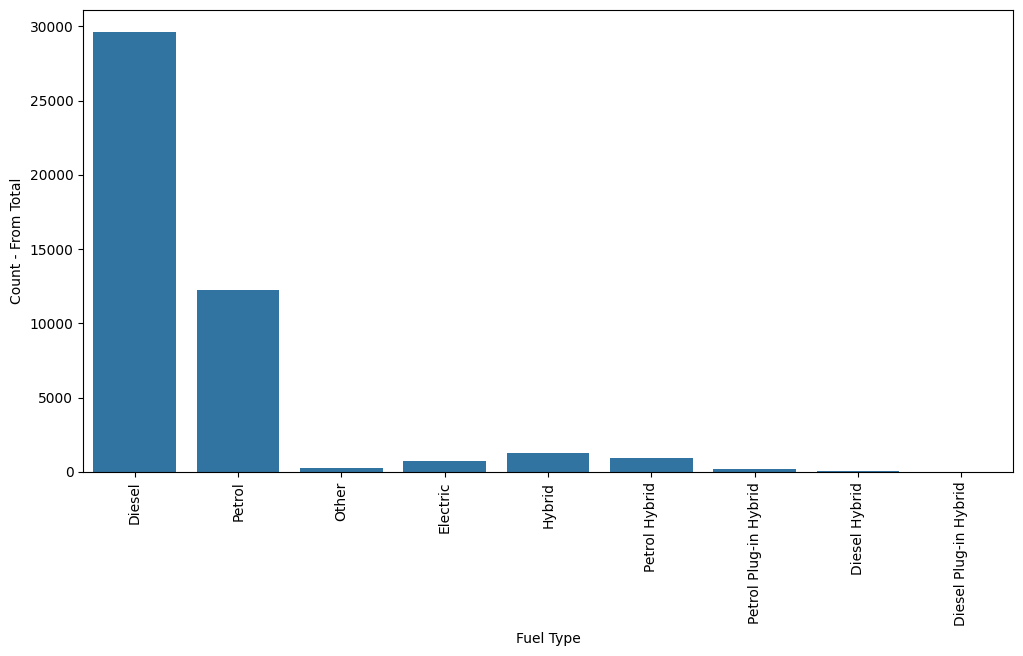

In [341]:
plt.figure(figsize=(12 ,6))
sns.countplot(x='fuel type'  , data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()

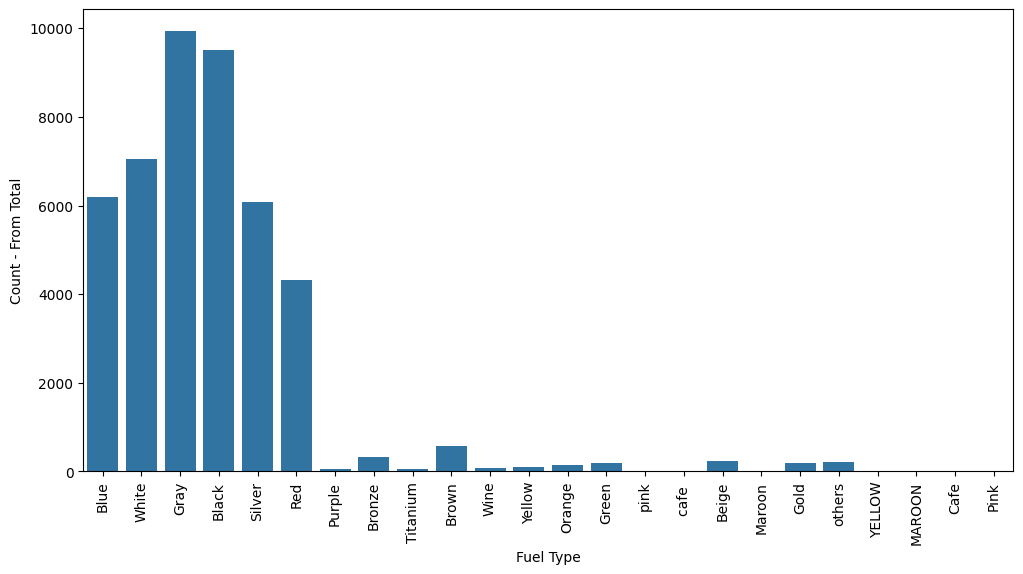

In [342]:
plt.figure(figsize=(12 ,6))
sns.countplot(x='Color'  , data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()

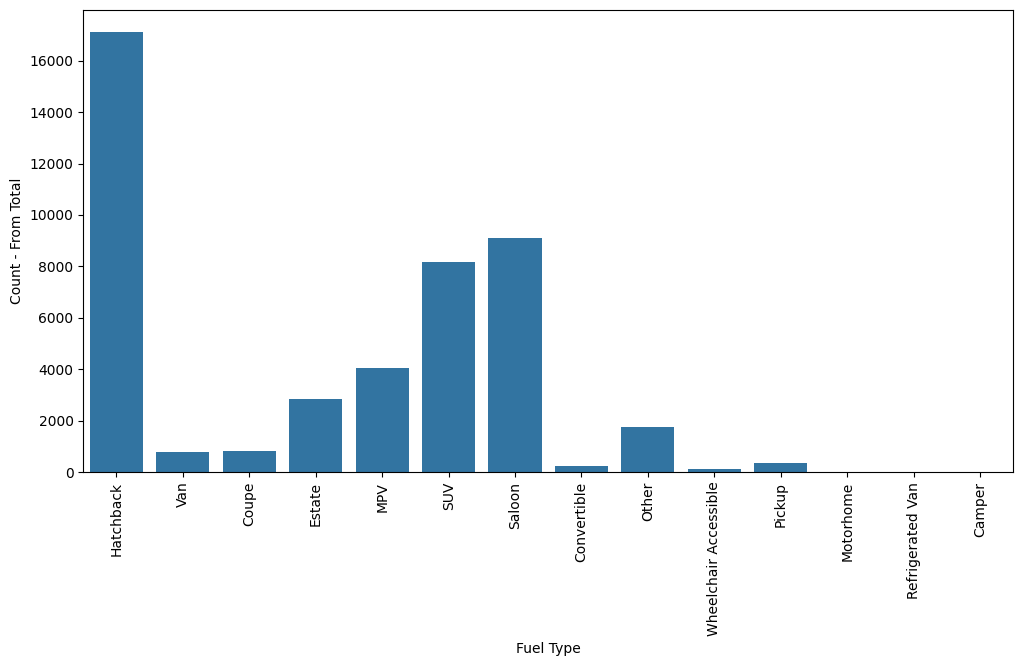

In [343]:
plt.figure(figsize=(12 ,6))
sns.countplot(x='body type'  , data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()

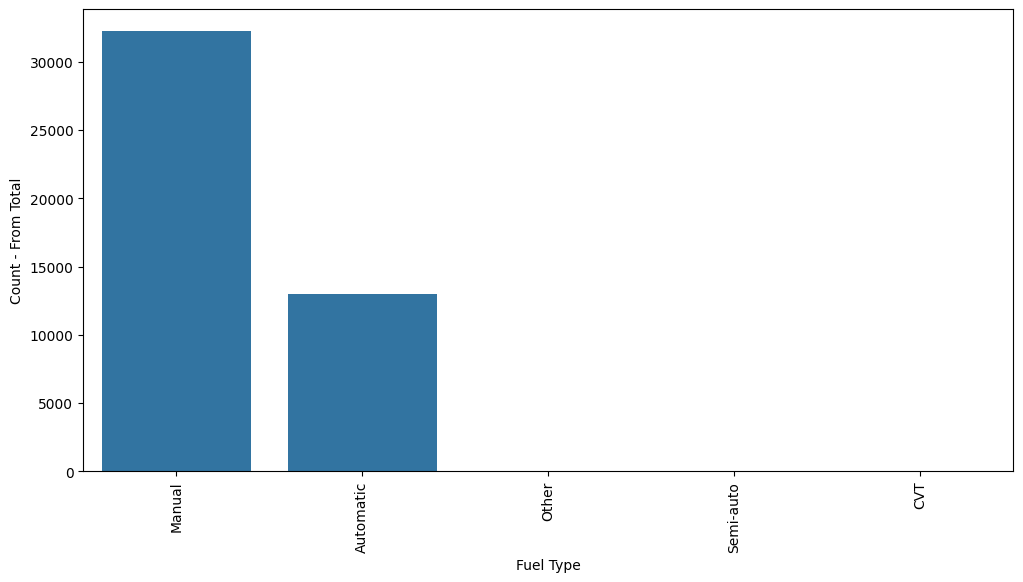

In [344]:
plt.figure(figsize=(12 ,6))
sns.countplot(x='transmission'  , data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
plt.show()

#### Conclusions from univariate analysis : 

1. Most Selling Cars are Manual Transmissins ones

Next steps would be bivariate analysis : we would compare two or more variable for the analysis and check how they are compatiable. 


In [345]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


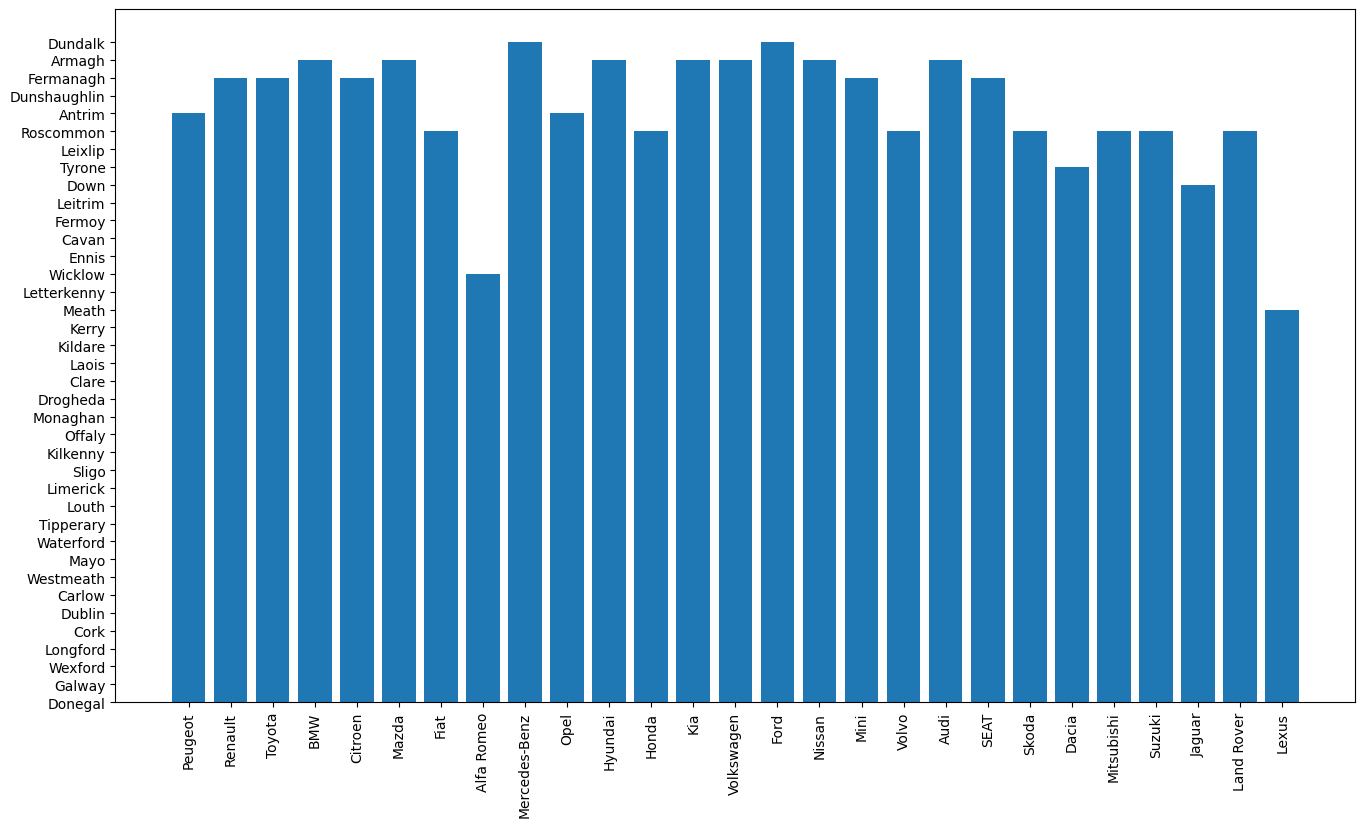

In [346]:
# Check the make vs location :
plt.figure(figsize=(16 ,9)) 
plt.bar(df.make , df.Location)
plt.xticks(rotation = 90)
plt.show()

we can also do the Make : 

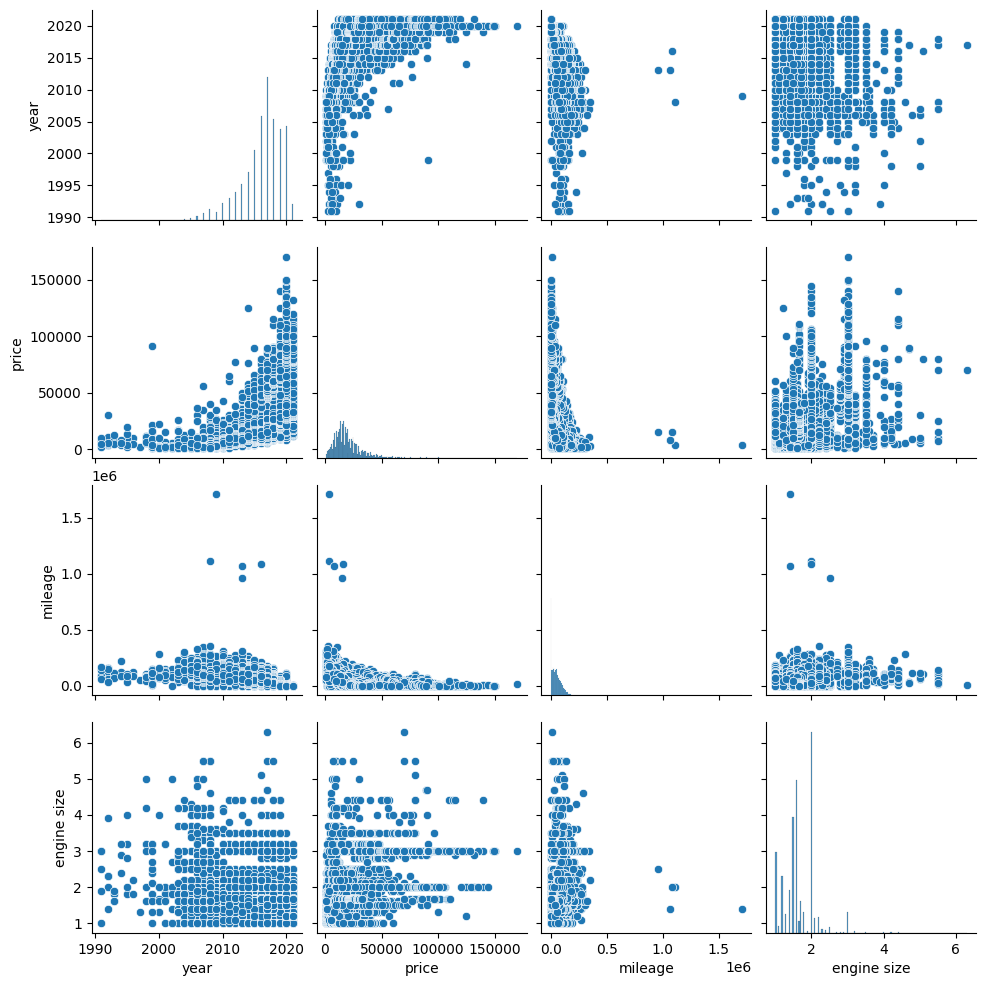

In [347]:
sns.pairplot(df)
plt.show()

In [348]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


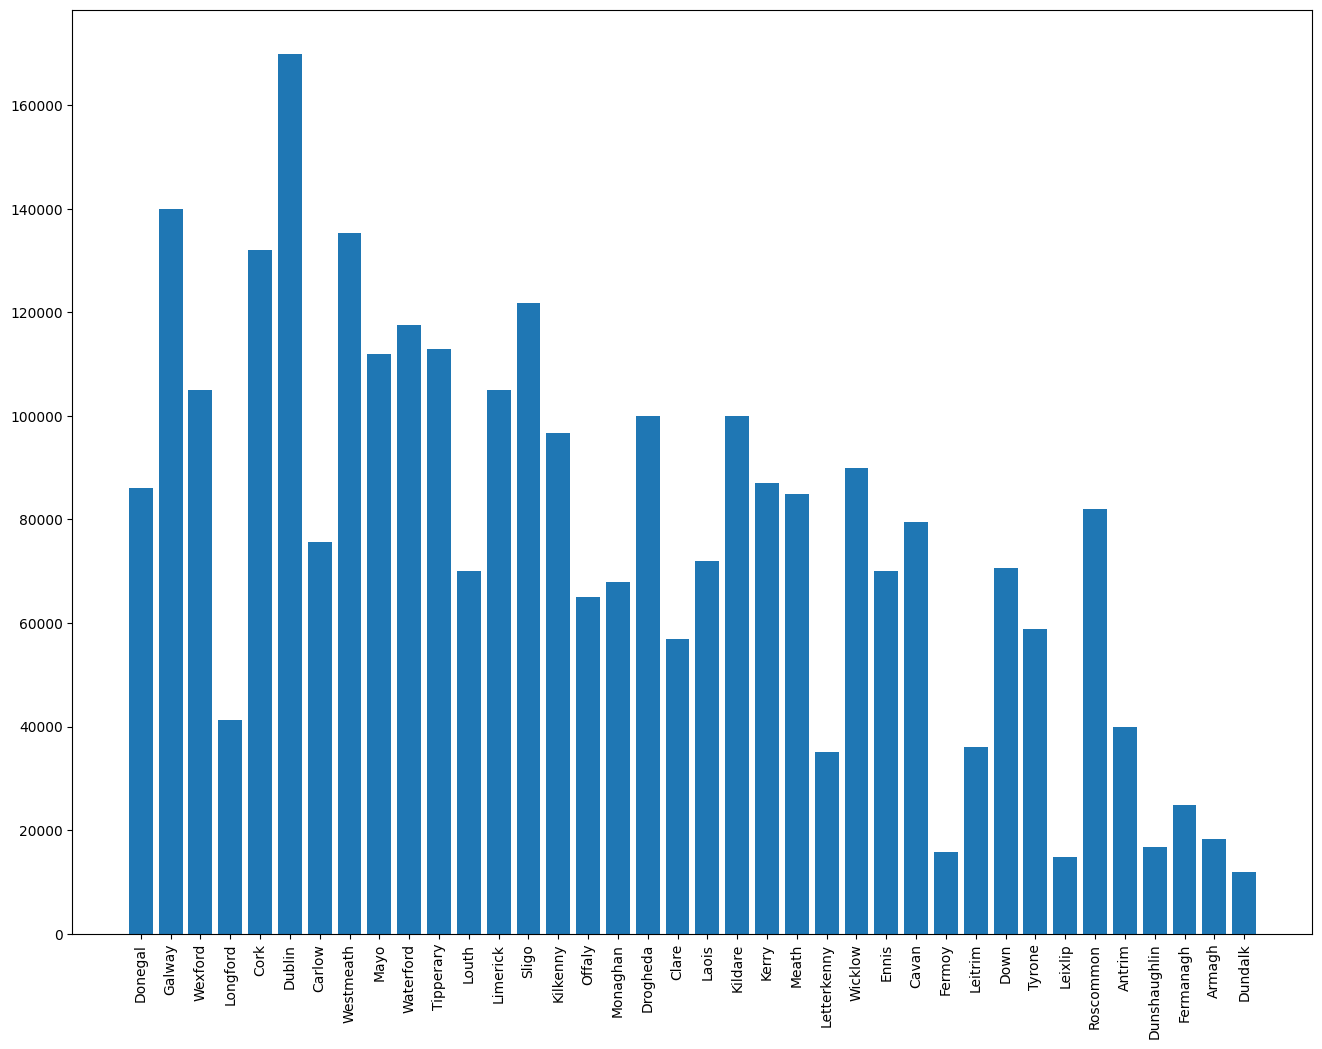

In [349]:
plt.figure(figsize=(16 ,12)) 
plt.bar(df['Location'] , df['price'])
plt.xticks(rotation = 90)
plt.show()

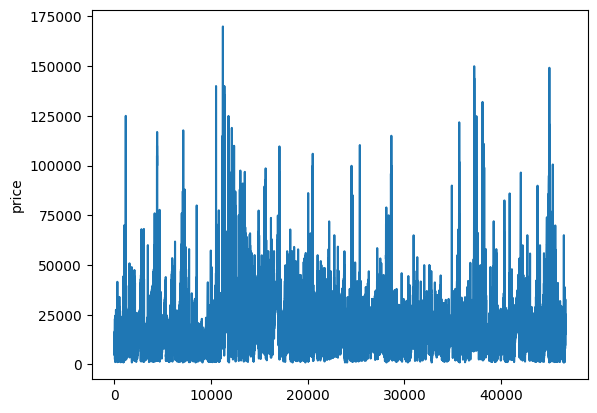

In [350]:
# Lets check the line blot to see the relation between the make and location : 
sns.lineplot(df['price'])
plt.show()

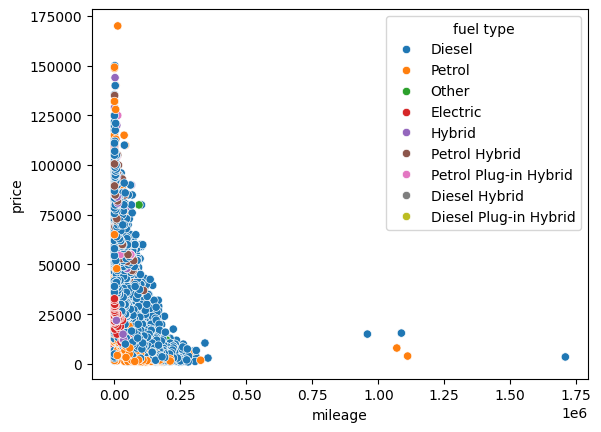

In [351]:
# Check the scatter plot for the price vs mileage and check the hue with the mileage :
sns.scatterplot(data=df , x='mileage' , y='price' , hue='fuel type')
plt.show()

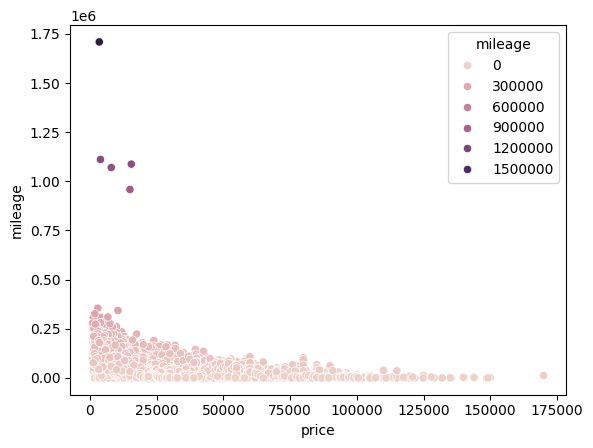

In [352]:
sns.scatterplot(data=df , x='price' , y='mileage' , hue='mileage')
plt.show()

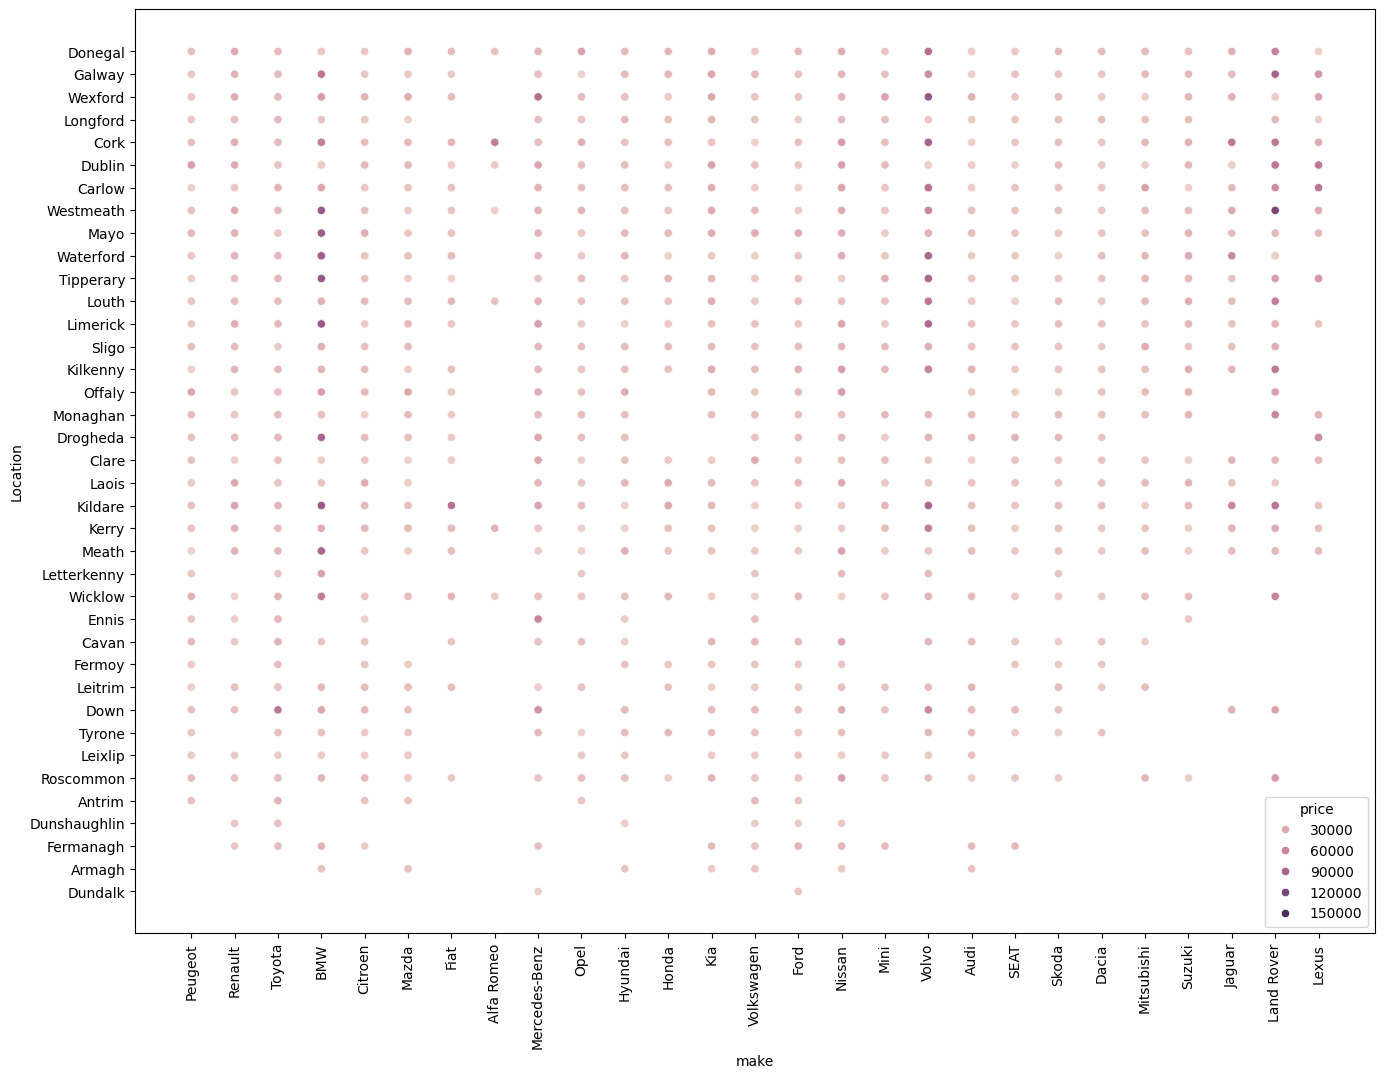

In [353]:
plt.figure(figsize=(16 ,12)) 

sns.scatterplot(data=df , x = 'make' , y='Location' , hue='price')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='make', ylabel='transmission'>

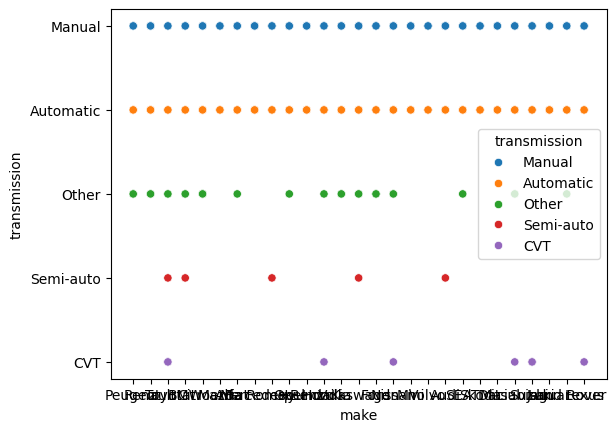

In [354]:
sns.scatterplot(data=df , x='make' , y='transmission' , hue='transmission')

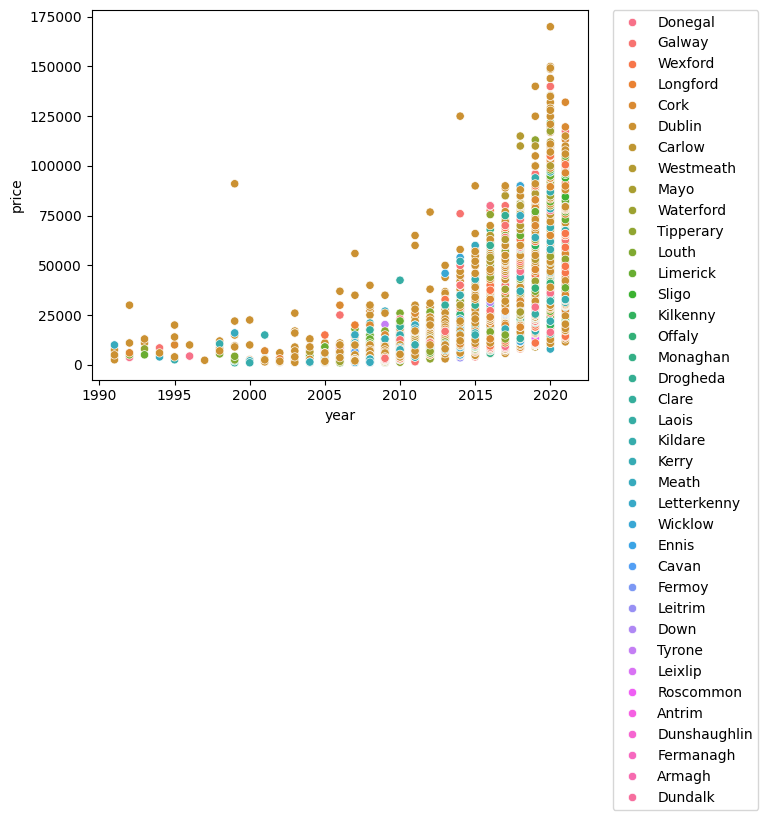

In [355]:
sns.scatterplot(data = df , x='year' , y='price' , hue='Location')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

<Axes: xlabel='Seller Type', ylabel='price'>

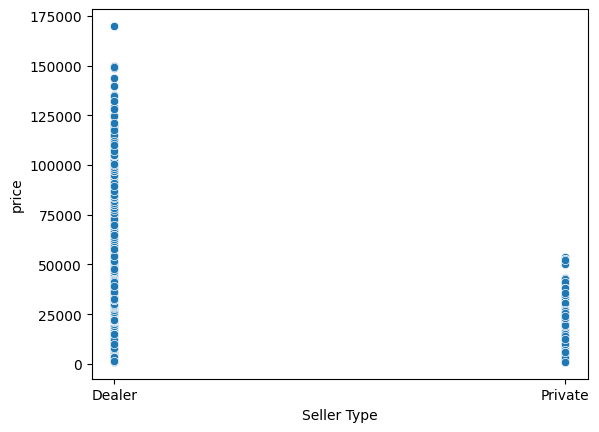

In [356]:
sns.scatterplot(data=df , x = 'Seller Type' , y='price')

In [357]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


<Axes: xlabel='price', ylabel='Count'>

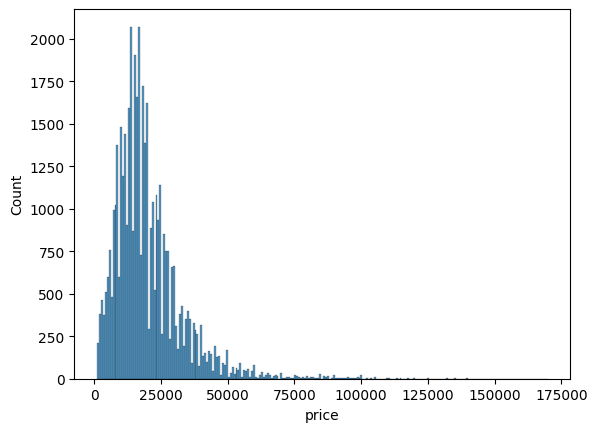

In [358]:
sns.histplot(data=df , x='price')

<Axes: xlabel='price', ylabel='Count'>

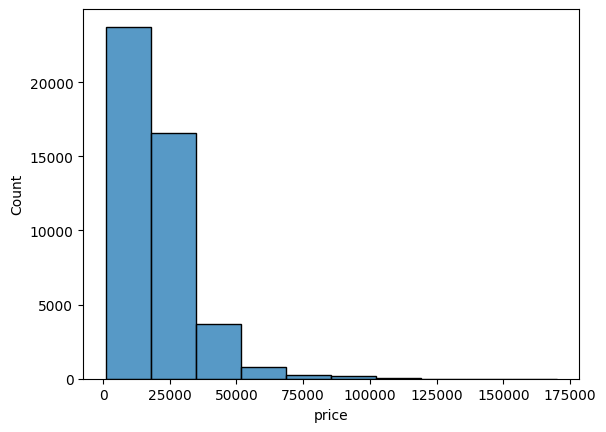

In [359]:
sns.histplot(data = df , x ='price' , bins = 10)

Check for the outliers in the dataset : make a single box plot for all the columns as they are only 12 :

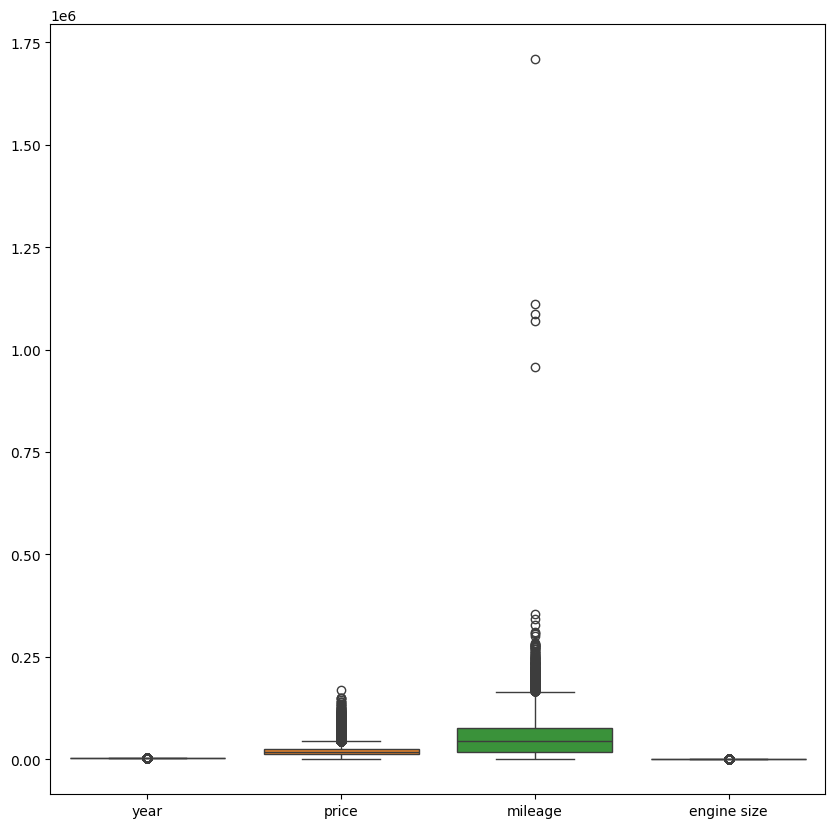

In [360]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df ,)
plt.show()

In [361]:
# The box plot doesnot look good and also we can determine that the plot as some outliers and we can check for the outliers and then maybe we can make a machine learning model for the same : 

# We can use the correlation matrix for the same: 


In [362]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [363]:
# Now some of the variabels aare cateogrical and we need ot change them to numerical variables : 

# Before that lets seee the correlation matrix : 

ml_df  = df
from sklearn.preprocessing import LabelEncoder

In [364]:
le = LabelEncoder()

backup_df = df

In [365]:
encode_columns = ['make' , 'fuel type' , 'Color' , 'body type' , 'transmission' , 'Seller Type' , 'Location']

In [366]:
df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [367]:
ml_df = df

In [368]:
ml_df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,Manual,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,Manual,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,Manual,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,Manual,Dealer,Cork


In [369]:
for col in encode_columns:
    ml_df[col] = le.fit_transform(ml_df[col])

In [370]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45325 entries, 0 to 46638
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          45325 non-null  int64  
 1   model         45325 non-null  object 
 2   year          45325 non-null  int64  
 3   price         45325 non-null  float64
 4   mileage       45325 non-null  float64
 5   fuel type     45325 non-null  int64  
 6   engine size   45325 non-null  float64
 7   Color         45325 non-null  int64  
 8   body type     45325 non-null  int64  
 9   transmission  45325 non-null  int64  
 10  Seller Type   45325 non-null  int64  
 11  Location      45325 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 4.5+ MB


In [371]:
df['model'] = le.fit_transform(df['model'])

In [372]:
ml_df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,19,23,2017,14500.0,26173.0,0,1.6,2,4,2,0,6
1,20,1,2014,8950.0,65516.0,0,2.0,17,12,2,0,15
2,20,1,2015,9975.0,37283.0,0,1.5,17,2,2,0,36
3,20,1,2015,11250.0,101000.0,0,1.6,7,12,2,0,24
4,19,33,2016,9500.0,125015.0,0,1.6,2,4,2,0,5


In [373]:
corr = ml_df.corr()

In [374]:
corr

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
make,1.000000,0.212490,0.007771,-0.140715,-0.018586,0.110552,-0.176327,0.044359,-0.083557,0.140084,-0.003375,-0.001934
model,0.212490,1.000000,0.023599,-0.014102,-0.019124,-0.000850,-0.032580,0.057265,-0.013812,0.143771,-0.020546,-0.008271
year,0.007771,0.023599,1.000000,0.605668,-0.734165,0.038800,-0.106228,-0.001903,0.068098,-0.109668,-0.136808,0.026712
price,-0.140715,-0.014102,0.605668,1.000000,-0.510552,-0.103743,0.416041,-0.095509,0.239481,-0.459293,-0.080491,0.022853
mileage,-0.018586,-0.019124,-0.734165,-0.510552,1.000000,-0.235436,0.188380,-0.018728,0.022471,0.105186,0.100199,0.011624
fuel type,0.110552,-0.000850,0.038800,-0.103743,-0.235436,1.000000,-0.482628,0.052835,-0.272283,-0.001478,0.001639,-0.083737
engine size,-0.176327,-0.032580,-0.106228,0.416041,0.188380,-0.482628,1.000000,-0.084847,0.345376,-0.410608,0.017136,0.015910
Color,0.044359,0.057265,-0.001903,-0.095509,-0.018728,0.052835,-0.084847,1.000000,-0.038795,0.076542,-0.004795,-0.004323
body type,-0.083557,-0.013812,0.068098,0.239481,0.022471,-0.272283,0.345376,-0.038795,1.000000,-0.146721,-0.020746,0.038901
transmission,0.140084,0.143771,-0.109668,-0.459293,0.105186,-0.001478,-0.410608,0.076542,-0.146721,1.000000,0.006643,0.038549


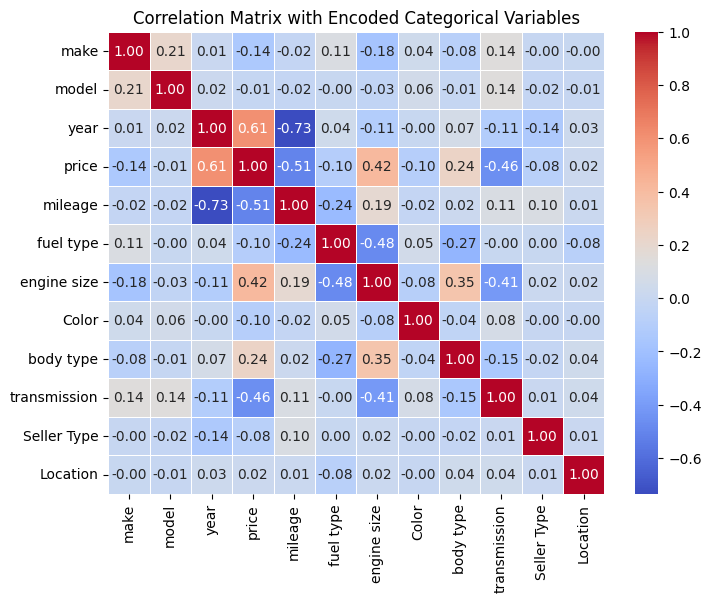

In [375]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()

In [376]:
# Lets check for the VIF variable inflation factor and confirm if the data is suitable for the linear regression  :
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = ml_df.drop(columns=['price']) 
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Feature        VIF
0           make   4.158207
1          model   4.521702
2           year  53.358723
3        mileage   2.658995
4      fuel type   2.188502
5    engine size  28.236120
6          Color   2.792984
7      body type   6.139784
8   transmission   4.720192
9    Seller Type   1.026815
10      Location   3.241892


make (VIF: 4.16)
model (VIF: 4.52)
mileage (VIF: 2.66)
fuel type (VIF: 2.19)
Color (VIF: 2.79)
transmission (VIF: 4.72)
Seller Type (VIF: 1.03)
Location (VIF: 3.24)


these are the ones with the VIF values :: to check the which features we have to take for the linear regresison now will check 

In [377]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



features = ml_df.columns

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(ml_df[features])

# Applying PCA
pca = PCA()
pca.fit(df_scaled)

# Get explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative sum of variance explained
components = np.arange(1, len(explained_variance) + 1)  # Component numbers


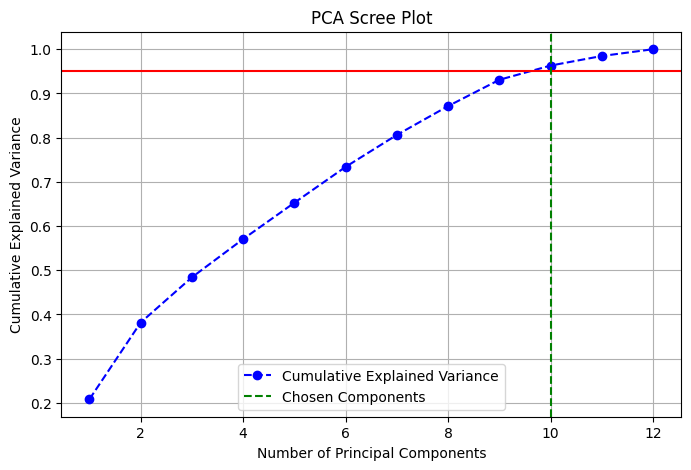

In [378]:
plt.figure(figsize=(8,5))
plt.plot(components, explained_variance, marker='o', linestyle='--', color='b', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.axhline(y=0.95, color='r', linestyle='-')  # Line at 95% variance
plt.axvline(x=np.argmax(explained_variance >= 0.95) + 1, color='g', linestyle='--', label="Chosen Components")
plt.legend()
plt.grid()
plt.show()


Now the graph shows : we can define the model with the maximum 8 features as we also have confirmed that with the use of the VIF features
now the first 8 features for the linear regression we would be using the columns as : 


Seller Type, fuel type, mileage, Color,Location, make,model,transmission

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [380]:
ml_df.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,transmission,Seller Type,Location
0,19,23,2017,14500.0,26173.0,0,1.6,2,4,2,0,6
1,20,1,2014,8950.0,65516.0,0,2.0,17,12,2,0,15
2,20,1,2015,9975.0,37283.0,0,1.5,17,2,2,0,36
3,20,1,2015,11250.0,101000.0,0,1.6,7,12,2,0,24
4,19,33,2016,9500.0,125015.0,0,1.6,2,4,2,0,5


In [381]:
# x = ml_df([['Seller Type' , 'fuel type' , 'mileage' , 'Color' , 'Location' , 'make' , 'model' , 'transmission']])

y = ml_df['price']
x = ml_df.drop(['year' , 'price' , 'engine size' , 'body type'] , axis = 1 , inplace = True)


In [382]:
y.head()

0    14500.0
1     8950.0
2     9975.0
3    11250.0
4     9500.0
Name: price, dtype: float64

In [383]:
ml_df.head()

,make,model,mileage,fuel type,Color,transmission,Seller Type,Location
0,19,23,26173.0,0,2,2,0,6
1,20,1,65516.0,0,17,2,0,15
2,20,1,37283.0,0,17,2,0,36
3,20,1,101000.0,0,7,2,0,24
4,19,33,125015.0,0,2,2,0,5


In [384]:
x = ml_df

In [385]:
x.head()

,make,model,mileage,fuel type,Color,transmission,Seller Type,Location
0,19,23,26173.0,0,2,2,0,6
1,20,1,65516.0,0,17,2,0,15
2,20,1,37283.0,0,17,2,0,36
3,20,1,101000.0,0,7,2,0,24
4,19,33,125015.0,0,2,2,0,5


In [386]:
y.head()

0    14500.0
1     8950.0
2     9975.0
3    11250.0
4     9500.0
Name: price, dtype: float64

In [387]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [388]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [389]:
y_pred = model.predict(X_test)

In [390]:
y_pred

array([26045.16363746, 18009.66761953, 10555.0900219 , ...,
       12580.84808828, 21291.97622795, 22538.03915343], shape=(9065,))

In [391]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 6186.617967140835
MSE: 91750620.99207647
R2 Score: 0.48623442827792995


the R2 score shows that the model is not reliable because the there are outliers present in the model which needs to be dealt with. 
As we already have seen the the ouliers in the dataset and we can remove the same using the IQR method  : 

we would be ding the IQR method and remove the outliers ; 

In [392]:
Q1 = ml_df.quantile(0.25)
Q3 = ml_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [393]:
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [394]:
df_no_outliers.shape

(44055, 8)

THis is the one approach and we also can do the second approach using the scipy library this second approach is the better one and is more reliable and automated:

In [395]:
from scipy import stats


In [396]:
z_scores = stats.zscore(ml_df)

In [397]:
threshold = 3   # Generally this is 3 or -3 

In [398]:
df_no_outliers_2 = df[(z_scores < threshold).all(axis=1)]

In [399]:
# Check the data frame for the second method  : 
df_no_outliers_2.shape

(44351, 8)

In [400]:
# there is a difference inthe shape of the data frame so we would be proceeding with the first method then : 
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44055 entries, 0 to 46638
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          44055 non-null  int64  
 1   model         44055 non-null  int64  
 2   mileage       44055 non-null  float64
 3   fuel type     44055 non-null  int64  
 4   Color         44055 non-null  int64  
 5   transmission  44055 non-null  int64  
 6   Seller Type   44055 non-null  int64  
 7   Location      44055 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.0 MB


In [401]:
df_no_outliers.head()

,make,model,mileage,fuel type,Color,transmission,Seller Type,Location
0,19,23,26173.0,0,2,2,0,6
1,20,1,65516.0,0,17,2,0,15
2,20,1,37283.0,0,17,2,0,36
3,20,1,101000.0,0,7,2,0,24
4,19,33,125015.0,0,2,2,0,5


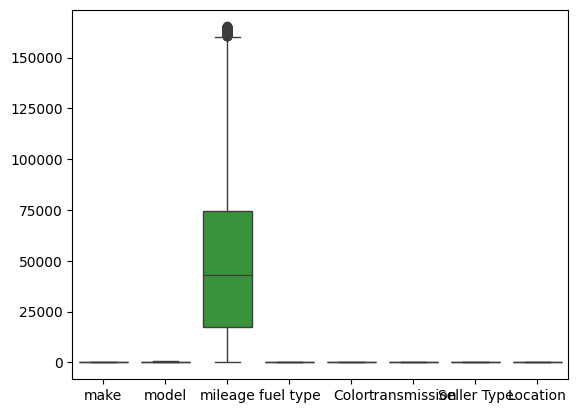

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_no_outliers)
plt.show()

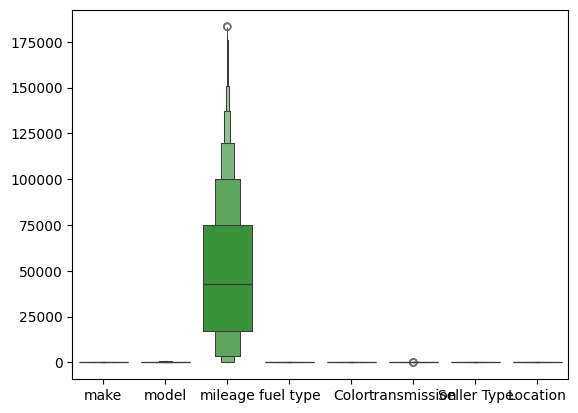

In [403]:
# Still it seems there are some outliers in the dataset  :
# Lets check for the second dataset and confirm for the outliers using teh boxplot : 
sns.boxenplot(data =df_no_outliers_2)
plt.show()

In [404]:
# Lets make the model : again for both the datasets one by one  : 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 6186.617967140835
MSE: 91750620.99207647
R2 Score: 0.48623442827792995


Lets do the initial steps of the importing the dataset and filtering the datset again or we can make the code so that reach time multiple batches of the datset are done for the analysis : 


In [405]:
# Importing the data frame again with the different name and applying the steps for the machine learning model again : 
df_2 = pd.read_csv('cars_data.csv')

In [406]:
df_2.head()

,make,model,year,price,mileage,fuel type,engine size,Color,body type,owners,transmission,seats,fuel economy,max speed,engine power,Seller Type,Location
0,Peugeot,208,2017,14500.0,26173.0,Diesel,1.6,Blue,Hatchback,1.0,Manual,5.0,81.0,116.0,99.0,Dealer,Donegal
1,Renault,100,2014,8950.0,65516.0,Diesel,2.0,White,Van,2.0,Manual,3.0,NaN,NaN,NaN,Dealer,Galway
2,Renault,100,2015,9975.0,37283.0,Diesel,1.5,White,Coupe,1.0,Manual,5.0,NaN,NaN,NaN,Dealer,Wexford
3,Renault,100,2015,11250.0,101000.0,Diesel,1.6,Gray,Van,1.0,Manual,3.0,NaN,NaN,NaN,Dealer,Longford
4,Peugeot,308,2016,9500.0,125015.0,Diesel,1.6,Blue,Hatchback,2.0,Manual,5.0,79.0,116.0,99.0,Dealer,Cork


In [407]:
# Drop the columns which are not required : 
dropping_columns  = ['owners', 'seats', 'fuel economy',
       'max speed', 'engine power']

# Dropping the above mentioned columns : 
df_2.drop(labels=dropping_columns , axis=1 , inplace=True)

In [416]:
mileage_mean  = df['mileage'].mean()
round(mileage_mean) # we are rounding it to check 


# Make the same for the engine size also :  
engine_size = df['engine size'].mean()
round(engine_size)

KeyError: 'engine size'

In [409]:
df_2 = df_2.dropna()

In [410]:
df_2 = df.drop_duplicates()

In [411]:
df_2.shape

(44657, 8)

In [412]:
# # We can prepare the data for the machine lerning model now : before that we need to scale the data and make the use of one hot encoding for preparing it for the machine leraning model : 
# from sklearn.preprocessing import LabelEncoder
# le  = LabelEncoder()

In [413]:
# df_2.head()

In [414]:
# encode_columns = ['make' , 'fuel type' , 'Color' , 'body type' , 'transmission' , 'Seller Type' , 'Location']

# for col in encode_columns:
#     df_2[col] = le.fit_transform(df_2[col])

In [415]:
df.head()

,make,model,mileage,fuel type,Color,transmission,Seller Type,Location
0,19,23,26173.0,0,2,2,0,6
1,20,1,65516.0,0,17,2,0,15
2,20,1,37283.0,0,17,2,0,36
3,20,1,101000.0,0,7,2,0,24
4,19,33,125015.0,0,2,2,0,5
